In [117]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingRegressor

In [118]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')
sample = pd.read_csv('SampleSubmission.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


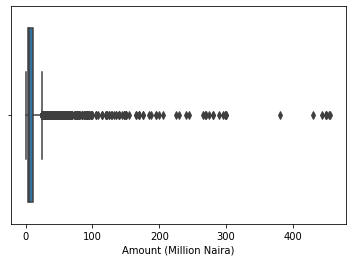

In [119]:
sns.boxplot(train['Amount (Million Naira)'])

In [120]:
mid_amount =  train.loc[train['Amount (Million Naira)'] <= 100, 'Amount (Million Naira)'].median()

In [121]:
train.loc[train['Amount (Million Naira)'] > 100, 'Amount (Million Naira)']= np.nan

In [122]:
train['Amount (Million Naira)'].fillna(mid_amount, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


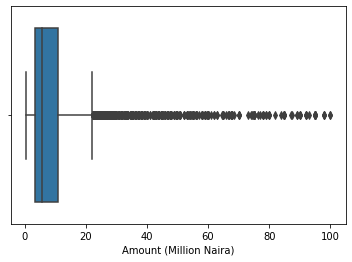

In [123]:
sns.boxplot(train['Amount (Million Naira)'])

In [124]:
mid_amount =  train.loc[train['Amount (Million Naira)'] <= 20, 'Amount (Million Naira)'].median()

In [125]:
train.loc[train['Amount (Million Naira)'] > 20, 'Amount (Million Naira)']= np.nan

In [126]:
train['Amount (Million Naira)'].fillna(mid_amount, inplace = True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


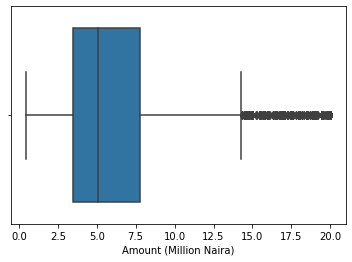

In [127]:
sns.boxplot(train['Amount (Million Naira)'])

In [128]:
train.head()

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,"2,011",Silver,2.20,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,"2,012",Silver,3.50,Nigerian Used,"125,000"
2,VHL19499,Lagos,Lexus,RX 350,"2,010",Red,9.20,Foreign Used,"110,852"
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,"2,017",Blue,5.06,Foreign Used,"30,000"
4,VHL12170,Ibadan,Toyota,Highlander,"2,002",Red,2.60,Nigerian Used,"125,206"


In [129]:
train['Year_2'] = train.Year.str.replace(',','').astype(float)
train['Distance_2'] = train.Distance.str.replace(',',"").astype(float)
test['Year_2'] = test.Year.str.replace(',',"").astype(float)

In [130]:
cat_features = {
    "Location",
    "Maker",
    "Model",
    "Colour",
    "Type"
}


for cat_feature in cat_features:
  print(cat_feature, test[cat_feature].unique(), sep=":")
  print("#"*50)

Model:['323i' 'Camry' 'Highlander Limited V6' 'ES 350 FWD' 'GLE-Class'
 'Sienna LE 4dr' 'ES 350' 'CR-V' 'RAV4 XLE FWD' 'RX' 'Sequoia'
 '4-Runner Limited' 'Corolla LE' 'Accord' 'Highlander SE' 'Vibe AWD'
 'RX 350 F Sport FWD' 'Creta' 'Range Rover Vogue' 'E320'
 'Land Cruiser Prado' 'Sonata' 'Sienna' '4-Runner Limited 4WD' 'C300'
 'E350' 'L200 Double Cab 2.5 136hp' 'Avalon XLE Plus (3.5L 6cyl 6A)'
 '4-Runner' 'RX 330' 'Touareg' 'GX 460 Base' 'GL-Class' 'M Class'
 'M Class ML 350 4Matic' 'GLK-Class' 'ES' 'Corolla' 'TLX' 'LX 570 Base'
 'Hilux' 'RX 350' 'IS 350' 'Premacy' 'Venza XLE AWD V6' 'RX 350 AWD'
 'E300' 'Edge SE 4dr FWD (3.5L 6cyl 6A)' 'Corolla CE' 'Venza AWD' 'Xj'
 'Zafira' 'Highlander 3' 'Camry SE FWD (2.5L 4cyl 8AM)' 'X5 3.0i'
 'Genesis' 'RVR' 'X3 xDrive30i AWD' 'Highlander XLE V6 4x2 (3.5L 6cyl 6A)'
 'RX 300' 'Venza' 'GX 460' 'EX 35' 'S-Class S 63 AMG 4MATIC (W222)'
 'C-Class C 350 (S204)' 'Venza V6' 'S-Class' 'Sienna LE AWD'
 'Highlander Limited 3.5L 2WD' 'Santa Fe GLS' 'Sharan

In [131]:
categories = {
    "Location",
    "Maker",
    "Model",
    "Colour",
    "Type"
}

In [132]:
for cat in categories:
  print(cat, train[cat].unique(), sep=":")
  print("#"*50)

Model:['Accord Coupe EX V-6' 'Sonata' 'RX 350' ... 'Almera 1.6 Lux'
 'X5 3.0i Sports Activity' '320i SV Premium']
##################################################
Location:['Abuja' 'Ibadan' 'Lagos']
##################################################
Maker:['Honda' 'Hyundai' 'Lexus' 'Mercedes-Benz' 'Toyota' 'Acura' 'Dodge'
 'Nissan' 'Kia' 'BMW' 'Volvo' 'Ford' 'Land Rover' 'Lincoln' 'Peugeot'
 'Chevrolet' 'Audi' 'Jaguar' 'Infiniti' 'Porsche' 'Fiat' 'Maserati'
 'Volkswagen' 'Suzuki' 'Bentley' 'GAC' 'Mazda' 'Scion' 'Renault'
 'Mitsubishi' 'Mini' 'Pontiac' 'Cadillac' 'Ferrari' 'Jeep' 'Buick'
 'Rolls-Royce' 'GMC' 'Chrysler' 'Lamborghini' 'Citroen' 'King' 'BAW'
 'Saturn' 'Tata' 'Opel' 'JAC' 'MG' 'Hummer' 'Subaru' 'Rover' 'Saab'
 'Skoda' 'IVM' 'Brabus']
##################################################
Type:['Nigerian Used' 'Foreign Used' 'Brand New' nan]
##################################################
Colour:['Silver' 'Red' 'Blue' 'Black' 'Gold' 'White' 'Gray' 'Burgandy' 'Green'
 'Viole

In [133]:
train["Type"].fillna(train["Type"].mode()[0], inplace=True)
train["Year_2"].fillna(train["Year_2"].mode()[0], inplace=True)

test["Type"].fillna(train["Type"].mode()[0], inplace=True)
test["Year_2"].fillna(train["Year_2"].mode()[0], inplace=True)

In [134]:
train["Amount (Million Naira)"].fillna(train["Amount (Million Naira)"].mean(), inplace=True)

In [135]:
train["Distance_2"].fillna(train["Distance_2"].mean(), inplace=True)

test["Distance"].fillna(train["Distance_2"].mean(), inplace=True)

In [136]:
test.rename(columns={'Distance':'Distance_2'}, inplace=True)

In [137]:
X = train.drop(['Amount (Million Naira)', 'Year', 'VehicleID', 'Distance'], axis=1)
y = train['Amount (Million Naira)']

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [153]:
lbl = LabelEncoder()
columns = ["Location", "Maker", 'Model', "Colour", "Type"]

X_train_encode = X_train[columns].apply(lbl.fit_transform)

In [154]:
X_test_encode = X_test[columns].apply(lbl.fit_transform)

test_encode = test[columns].apply(lbl.fit_transform)

In [155]:
X_train.head()

,Location,Maker,Model,Colour,Type,Year_2,Distance_2
1224,Lagos,Lexus,IS 350 C,White,Foreign Used,2010.0,68253.000000
142,Abuja,Peugeot,206,Blue,Nigerian Used,2005.0,103198.903612
1490,Abuja,Mercedes-Benz,M Class ML 350 4x2,Black,Foreign Used,2013.0,37800.000000
6221,Ibadan,Lexus,ES 330,White,Foreign Used,2005.0,145000.000000
2666,Ibadan,Toyota,Corolla LE,Black,Nigerian Used,2007.0,103198.903612


In [156]:
X_train_new = pd.concat([X_train_encode, X_train[['Distance_2', 'Year_2']]], axis=1)
X_train_new.shape

(5043, 7)

In [157]:
X_test_new = pd.concat([X_test_encode, X_test[['Distance_2', 'Year_2']]], axis=1)
test_new = pd.concat([test_encode, test[['Distance_2', 'Year_2']]], axis=1)

In [158]:
X_train_new.head()

,Location,Maker,Model,Colour,Type,Distance_2,Year_2
1224,2,29,531,19,1,68253.000000,2010.0
142,0,39,2,2,2,103198.903612,2005.0
1490,0,34,610,1,1,37800.000000,2013.0
6221,1,29,330,19,1,145000.000000,2005.0
2666,1,51,293,1,2,103198.903612,2007.0


In [159]:
from sklearn.ensemble import RandomForestRegressor

In [160]:
lr = LinearRegression()
rf = RandomForestRegressor(random_state = 42)

In [161]:
model = VotingRegressor([('rf', rf),('lr', lr)], weights = [1,1])

In [162]:
model.fit(X_train_new, y_train)

VotingRegressor(estimators=[('rf', RandomForestRegressor(random_state=42)),
                            ('lr', LinearRegression())],
                weights=[1, 1])

In [163]:
y_pred = model.predict(X_test_new)

In [164]:
print(mean_squared_error(y_test, y_pred)**0.5)

3.556458478438386


In [165]:
answer = model.predict(test_new)

In [166]:
answer

array([3.64621909, 6.30150084, 3.66946488, ..., 8.72872704, 6.26649501,
       4.76907272])

In [167]:
sample['Amount (Million Naira)'] = answer

In [169]:
sample.to_csv('Submission14.csv', index = False)